In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
df = pd.read_csv('transactions.csv')
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [61]:
df.duplicated().value_counts()

False    299694
Name: count, dtype: int64

In [62]:
df.isna().sum()

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

In [63]:
df['is_fraud'].value_counts()

is_fraud
0    293083
1      6611
Name: count, dtype: int64

In [64]:
cols_to_drop = [
    "transaction_id",
    "user_id", 
    "transaction_time"
]

df = df.drop(columns=cols_to_drop)

In [65]:
print(df['country'].unique())
print(df["bin_country"].unique())
print(df["channel"].unique())
print(df["merchant_category"].unique())
print(df["avs_match"].unique())
print(df["cvv_result"].unique())
print(df["promo_used"].unique())
print(df["three_ds_flag"].unique())

['FR' 'US' 'TR' 'PL' 'ES' 'IT' 'RO' 'GB' 'NL' 'DE']
['FR' 'US' 'RO' 'ES' 'TR' 'DE' 'GB' 'IT' 'PL' 'NL']
['web' 'app']
['travel' 'fashion' 'electronics' 'grocery' 'gaming']
[1 0]
[1 0]
[0 1]
[1 0]


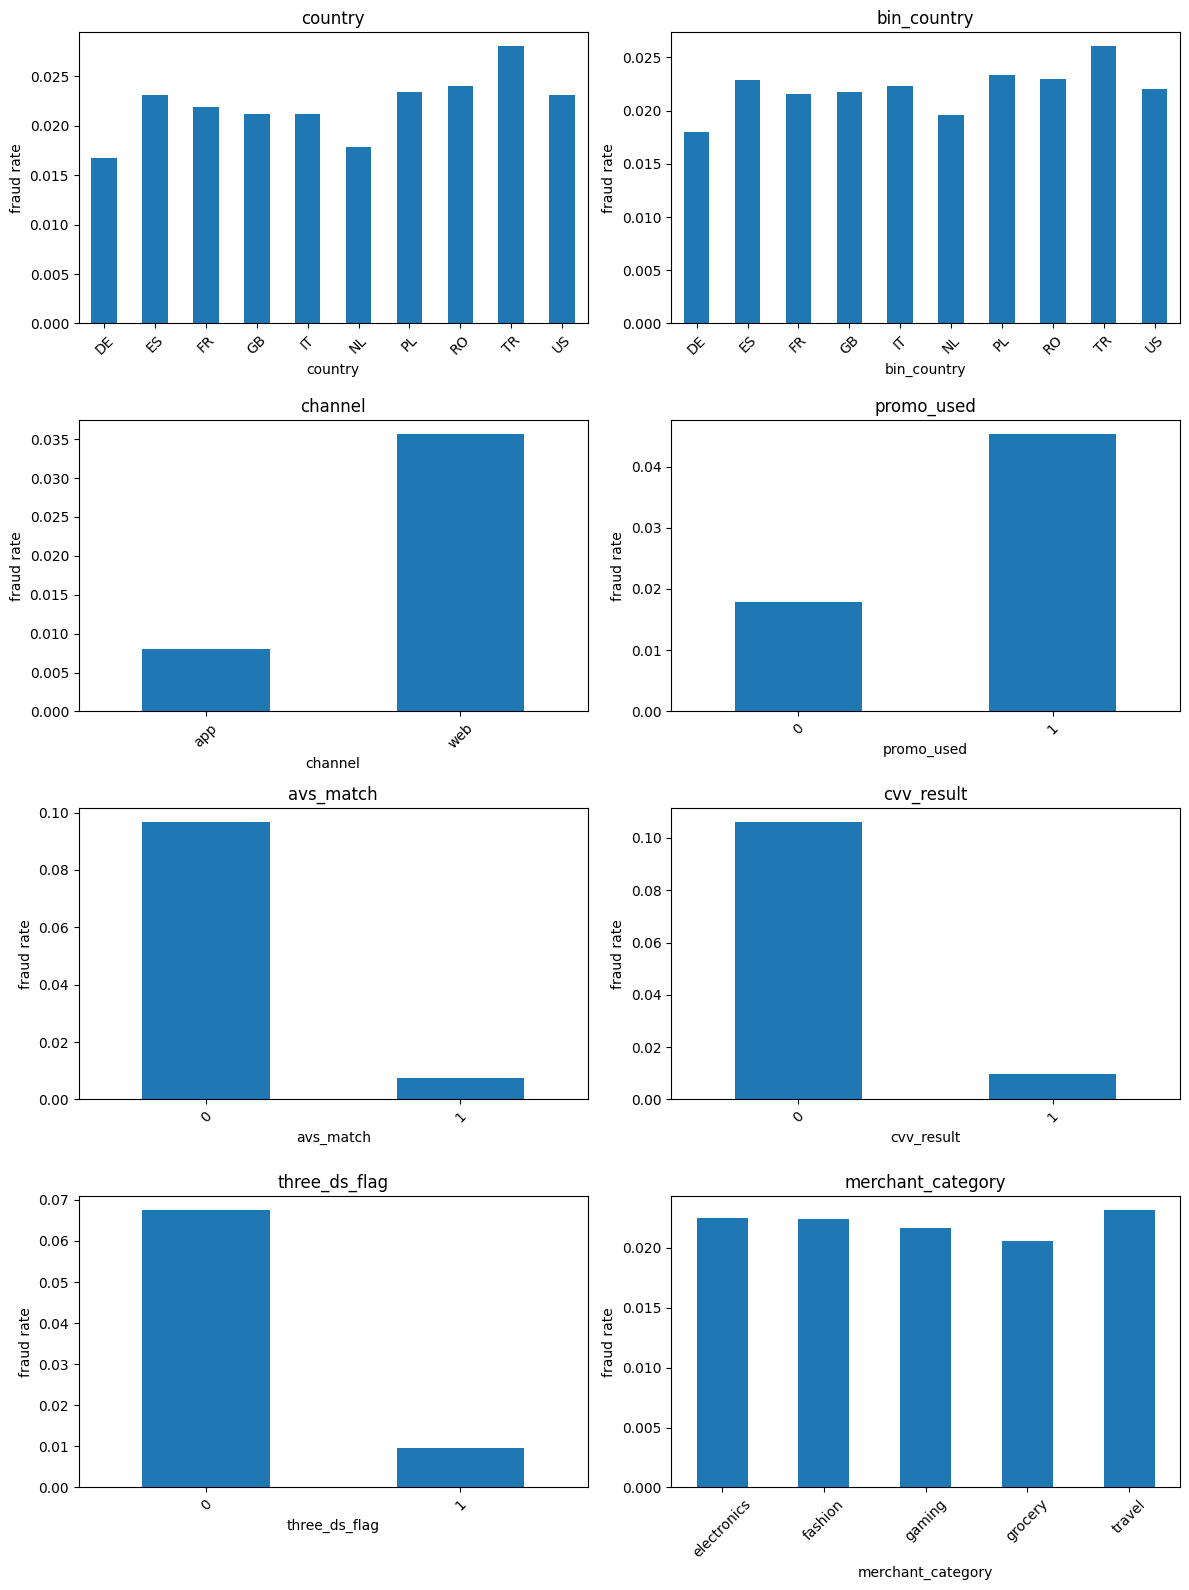

In [66]:
import matplotlib.pyplot as plt

categorical_cols = [
    "country", "bin_country", "channel",
    "promo_used", "avs_match", "cvv_result",
    "three_ds_flag", "merchant_category"
]

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    df.groupby(col)["is_fraud"].mean().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_ylabel("fraud rate")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [67]:
df.groupby("merchant_category")["is_fraud"].mean().sort_values(ascending=False)

merchant_category
travel         0.023163
electronics    0.022518
fashion        0.022408
gaming         0.021641
grocery        0.020563
Name: is_fraud, dtype: float64

In [68]:
#dropping merchant_category because fraud rates are almost the same so it has no predictive value
df = df.drop(columns={'merchant_category'})

In [69]:
df.groupby("channel")["is_fraud"].mean().sort_values(ascending=False)

channel
web    0.035638
app    0.008042
Name: is_fraud, dtype: float64

In [70]:
df["country_match"] = (df["country"] == df["bin_country"]).astype(int)

df.groupby("country_match")["is_fraud"].mean()

country_match
0    0.112769
1    0.014259
Name: is_fraud, dtype: float64

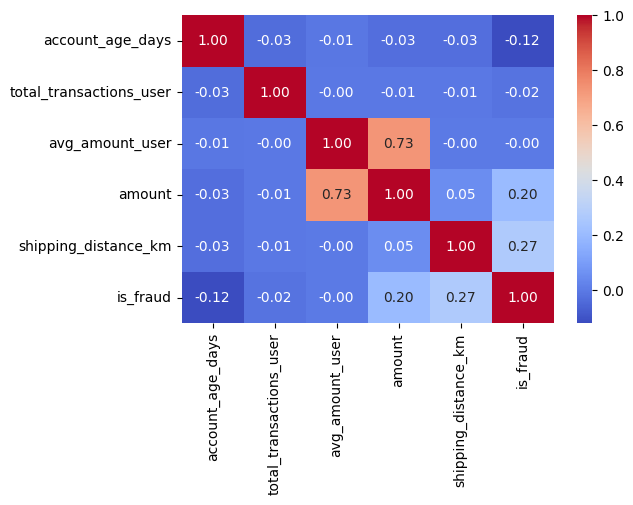

In [71]:
num_cols = [
    "account_age_days",
    "total_transactions_user",
    "avg_amount_user",
    "amount",
    "shipping_distance_km",
    "is_fraud"
]

corr = df[num_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [72]:
#'avg_amount_user' has zero correlation with 'is_fraud' and redundant with 'amount'.
df = df.drop(columns={'avg_amount_user'})

# "total_transactions_user" is weak too
df = df.drop(columns={'total_transactions_user'})



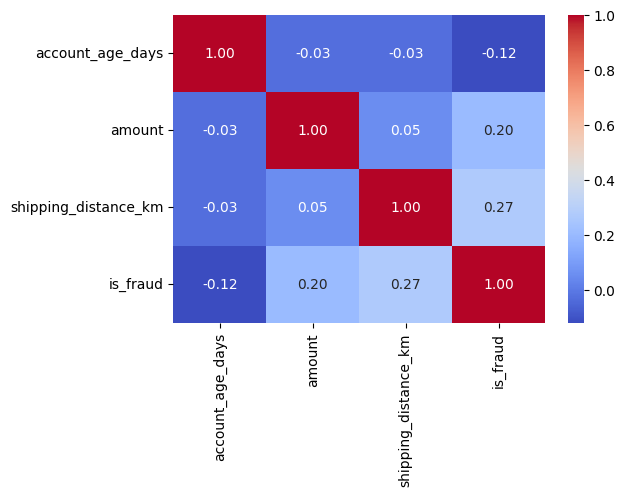

In [73]:
num_cols = [
    "account_age_days",
    "amount",
    "shipping_distance_km",
    "is_fraud"
]

corr = df[num_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [74]:
df

,account_age_days,amount,country,bin_country,channel,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud,country_match
0,141,84.75,FR,FR,web,0,1,1,1,370.95,0,1
1,141,107.90,FR,FR,web,0,0,0,0,149.62,0,1
2,141,92.36,FR,FR,app,1,1,1,1,164.08,0,1
3,141,112.47,FR,FR,web,0,1,1,1,397.40,0,1
4,141,132.91,FR,US,web,0,1,1,1,935.28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299689,996,34.07,ES,ES,web,0,1,1,0,218.55,0,1
299690,996,68.56,ES,ES,app,0,1,1,1,185.55,0,1
299691,996,25.02,ES,ES,app,0,1,1,1,33.50,0,1
299692,996,23.92,ES,ES,web,0,0,0,0,71.75,0,1


In [75]:
df = pd.get_dummies(df, columns=["country", "bin_country", "channel"], drop_first=True , dtype=int)

In [76]:
df.columns

Index(['account_age_days', 'amount', 'promo_used', 'avs_match', 'cvv_result',
       'three_ds_flag', 'shipping_distance_km', 'is_fraud', 'country_match',
       'country_ES', 'country_FR', 'country_GB', 'country_IT', 'country_NL',
       'country_PL', 'country_RO', 'country_TR', 'country_US',
       'bin_country_ES', 'bin_country_FR', 'bin_country_GB', 'bin_country_IT',
       'bin_country_NL', 'bin_country_PL', 'bin_country_RO', 'bin_country_TR',
       'bin_country_US', 'channel_web'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #ca c'est pour garder la meme proportion des pour la fraud apres le split
)


In [78]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    n_jobs=-1
)

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [79]:
from sklearn.metrics import classification_report, roc_auc_score

preds = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds))
print("AUC:", roc_auc_score(y_test, proba))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58617
           1       0.91      0.70      0.80      1322

    accuracy                           0.99     59939
   macro avg       0.95      0.85      0.90     59939
weighted avg       0.99      0.99      0.99     59939

AUC: 0.9727541825977329


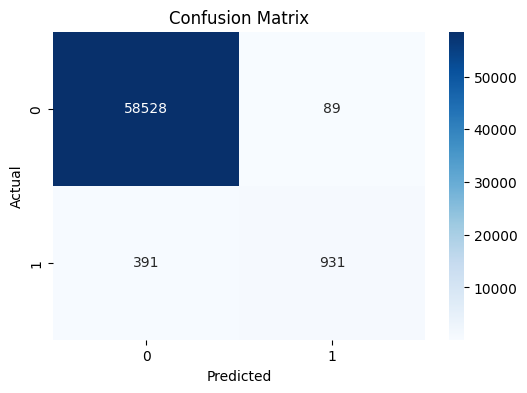

array([[58528,    89],
       [  391,   931]])

In [101]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, preds)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
cm

the model got a lot of False Negative , let's try to reduce it 

---

In [81]:
pos = sum(y_train == 1)
neg = sum(y_train == 0)
print("ratio =", neg / pos)

ratio = 44.33087540177728


In [82]:
ratio = neg / pos   # ≈ 44.33

model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=ratio,   #adding weight
    n_jobs=-1
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [ ]:
from sklearn.metrics import precision_recall_curve

proba = model.predict_proba(X_test)[:,1]

prec, rec, thr = precision_recall_curve(y_test, proba)

# F1 pour chaque threshold
f1 = 2 * (prec * rec) / (prec + rec + 1e-9)

best_idx = np.argmax(f1)
best_threshold = thr[best_idx]

print("Best threshold:", best_threshold)
print("Best F1:", f1[best_idx])


Best threshold: 0.9349528
Best F1: 0.7889757296560391


In [95]:
proba = model.predict_proba(X_test)[:,1]
preds_opt = (proba >= 0.9349528).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, preds_opt))

print(confusion_matrix(y_test, preds_opt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58617
           1       0.86      0.73      0.79      1322

    accuracy                           0.99     59939
   macro avg       0.93      0.86      0.89     59939
weighted avg       0.99      0.99      0.99     59939

[[58467   150]
 [  363   959]]


In [97]:
import joblib
joblib.dump(model, "xgboost_fraud_model2.pkl")


['xgboost_fraud_model2.pkl']

In [104]:
X_test.columns

Index(['account_age_days', 'amount', 'promo_used', 'avs_match', 'cvv_result',
       'three_ds_flag', 'shipping_distance_km', 'country_match', 'country_ES',
       'country_FR', 'country_GB', 'country_IT', 'country_NL', 'country_PL',
       'country_RO', 'country_TR', 'country_US', 'bin_country_ES',
       'bin_country_FR', 'bin_country_GB', 'bin_country_IT', 'bin_country_NL',
       'bin_country_PL', 'bin_country_RO', 'bin_country_TR', 'bin_country_US',
       'channel_web'],
      dtype='object')

In [ ]:
# df_filtered = df[
#     (df["is_fraud"] == 0)
#     & (df["promo_used"] == 0)
#     & (df["avs_match"] == 0)
#     & (df["cvv_result"] == 0)
#     & (df["three_ds_flag"] == 0)
# ]
# df_filtered

,account_age_days,amount,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud,country_match,country_ES,...,bin_country_ES,bin_country_FR,bin_country_GB,bin_country_IT,bin_country_NL,bin_country_PL,bin_country_RO,bin_country_TR,bin_country_US,channel_web
1,141,107.90,0,0,0,0,149.62,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,141,261.58,0,0,0,0,110.51,0,1,0,...,0,1,0,0,0,0,0,0,0,0
18,141,137.42,0,0,0,0,419.16,0,1,0,...,0,1,0,0,0,0,0,0,0,1
73,1598,98.31,0,0,0,0,8.95,0,1,0,...,0,0,0,0,0,0,0,0,1,0
74,1598,184.09,0,0,0,0,204.20,0,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299597,1069,63.34,0,0,0,0,464.52,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299603,1069,40.48,0,0,0,0,395.06,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299647,871,279.96,0,0,0,0,356.80,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299672,996,34.50,0,0,0,0,382.48,0,1,1,...,1,0,0,0,0,0,0,0,0,1
